<a href="https://colab.research.google.com/github/wangwenchih/Nccu_Geomatics/blob/main/%E6%B5%B7%E6%B4%8B%E6%B8%AC%E9%87%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.interpolate import interp1d
import plotly.express as px

In [ ]:
df_hve = pd.read_csv('161201.HVE',header=None,usecols=[0,1],names=["time", "depth_corr"])
df_sb = pd.read_csv('161201.SB',header=None,usecols=[0,1],names=["time", "depth"])
df_gga = pd.read_csv('161201N.GGA',header=None,usecols=[0,1,2],names=["time","N","E"])

func_gga = interp1d(df_gga["time"],[df_gga["N"],df_gga["E"]],fill_value="interpolate")
df_sb=df_sb[(df_sb["time"]<df_gga["time"].max())&(df_sb["time"]>df_gga["time"].min())]
df_sb["N"],df_sb["E"] = func_gga(df_sb["time"])

func_hve = interp1d(df_hve["time"],df_hve["depth_corr"],fill_value="interpolate")
df_sb=df_sb[(df_sb["time"]<df_hve["time"].max())&(df_sb["time"]>df_hve["time"].min())]
df_sb["depth_corr"] = func_hve(df_sb["time"])
df = pd.concat([df_hve,df_sb,df_gga])
df["H"] = -df["depth"]+df["depth_corr"]
df.sort_values(by=["time"],inplace=True)
df=df[(df['H']>-20)&(df['H']<-2)]
#df.dropna(subset = ["depth_refined"], inplace=True)
df.to_csv("data.csv")
df

,time,depth_corr,depth,N,E,depth_refined
16992,42705.660188,0.030,11.01,2.686906e+06,202584.281881,-10.980
16993,42705.660189,0.030,2.29,2.686906e+06,202584.184585,-2.260
17017,42705.660232,0.050,11.21,2.686906e+06,202581.908990,-11.160
17019,42705.660235,0.050,11.16,2.686906e+06,202581.753688,-11.110
17020,42705.660237,0.050,11.18,2.686906e+06,202581.676679,-11.130
...,...,...,...,...,...,...
90522,42705.701524,-0.010,11.06,2.686900e+06,202728.794651,-11.070
90523,42705.701524,-0.010,11.07,2.686900e+06,202728.676205,-11.080
90524,42705.701525,-0.015,11.07,2.686900e+06,202728.555567,-11.085
90525,42705.701525,-0.020,11.06,2.686900e+06,202728.437120,-11.080


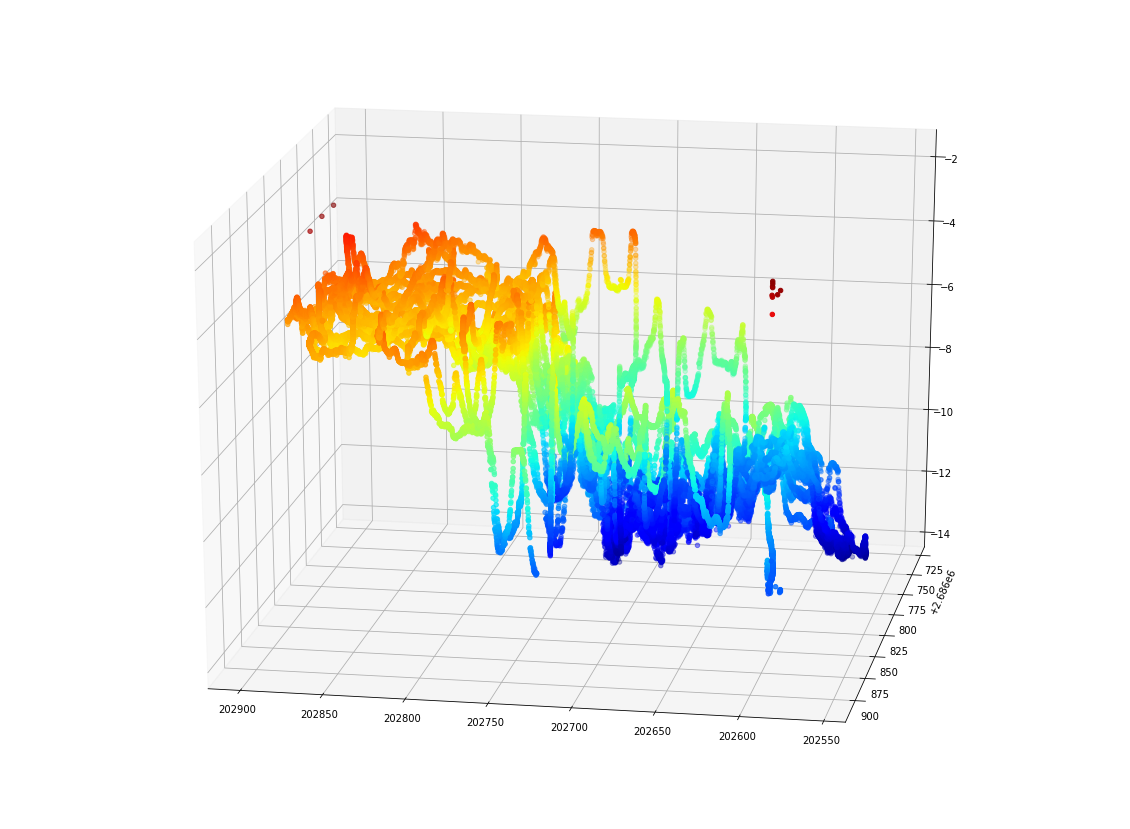

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
ax = plt.axes(projection='3d')
ax.view_init(20, 100)
ax.scatter(df['E'], df['N'],df['H'], c=df['H'] , cmap='jet')

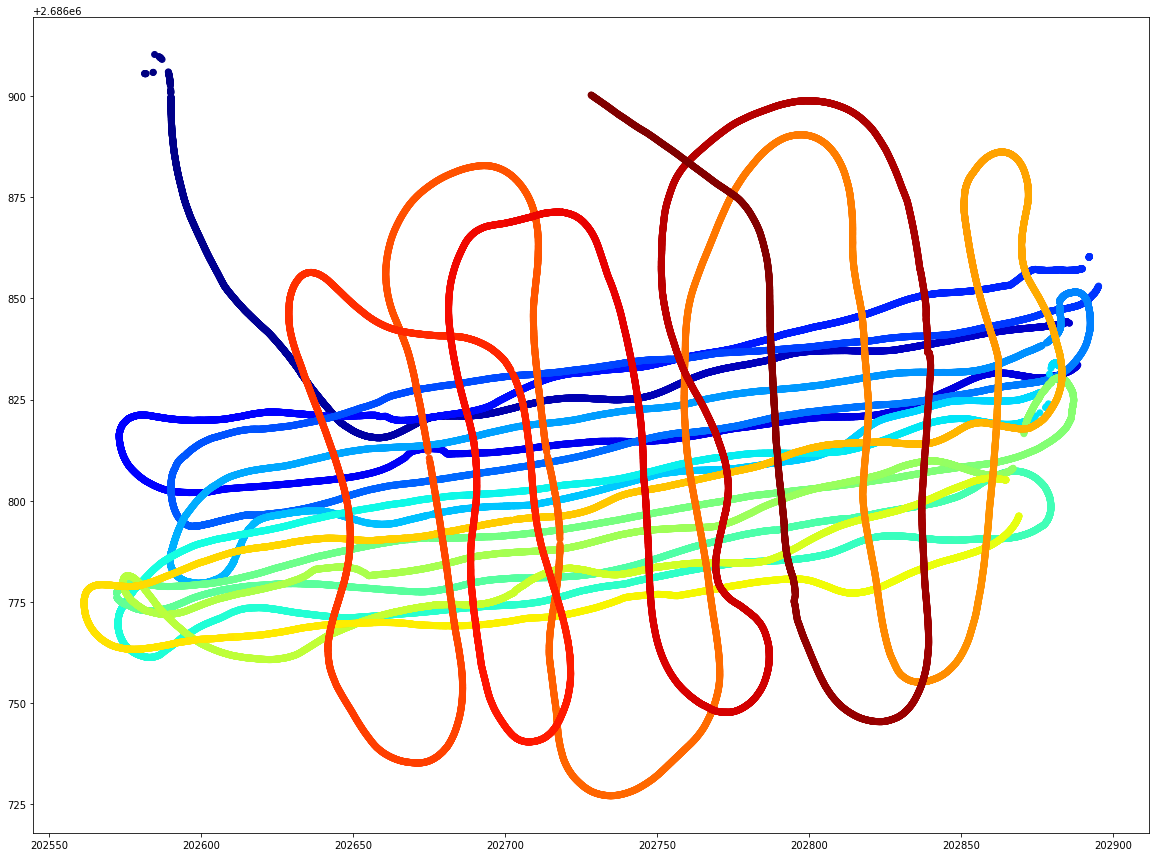

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
fig = plt.figure()
ax = fig.gca()
ax.scatter(df['E'], df['N'],c=df['time'] , cmap='jet')